## Deliverable 1

We will follow the CRISP-DM methodology

### Business Understanding

The goal of this project is to create a regression model that can predict car prices based on its details. This includes:
- Regression Benchmarking
- Model Optimization
- Additional Insights

### Data Understanding

#### **Metadata**:

- **carID** :  An attribute that contains an identifier for each car.
- **Brand** :  The car’s main brand (e.g. Ford, Toyota).
- **model** : The car model.
- **year** : The year of Registration of the Car.
- **transmission** - Type of transmission of the car (e.g. Manual, Automatic, Semi-Automatic)
- **mileage** : The total reported distance travelled by the car (in miles).
- **tax** :  The amount of road tax (in £) that, in 2020, was applicable to the car in question. 
- **fuelType** :  Type of Fuel used by the car (Diesel, Petrol, Hybrid, Electric).
- **mpg** : Average Miles per Gallon.
- **engineSize** : Size of Engine in liters (Cubic Decimeters).
- **paintQuality%** :  The mechanic’s assessment of the cars’ overall paint quality and hull integrity (filled by the mechanic during evaluation). 
- **previousOwners** : Number of previous registered owners of the vehicle.
- **hasDamage** :  Boolean marker filled by the seller at the time of registration stating whether the car is damaged or not.
- **price** : The car’s price when purchased by Cars 4 You (in £).


In [2]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from math import ceil
import difflib

In [3]:
# Import the train and test data sets
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.shape

(75973, 14)

In [5]:
df_train.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


We can already see that we have Null Values (at least in tax) and have strange values like negative previous owners

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    74451 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        74462 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


Identified Problems:

- Year and previousOwners is float when it should be integer
- hasDamage should be boolean instead of float

In [7]:
features_to_check_values = ['year', 'previousOwners', 'hasDamage', 'Brand', 'model', 'transmission', 'fuelType']

for feat in features_to_check_values:
    print(f'{feat} :' )
    print(df_train[feat].unique())

year :
[2016.         2019.         2018.         2014.         2017.
 2020.         2013.                   nan 2015.         2023.36707842
 2011.         2012.         2023.1169636  2003.         2009.
 2007.         2005.         2011.11118842 2011.21085349 2023.97731126
 2004.         2010.         2010.56500919 2008.         2024.12175905
 2006.         2023.60527574 2023.38982198 2010.67696784 2001.
 2000.         2023.26798867 2010.26863473 2010.37154646 2002.
 2022.69668507 2009.81675711 2010.7464032  2012.69574039 1996.
 1998.         2022.87800554 1970.         1999.         1997.        ]
previousOwners :
[ 4.          1.         -2.34030622  3.          0.          2.
         nan -2.34565     6.25837066 -2.33512284  6.22789796  6.25823052
  6.23017958 -2.33936045  6.21772443  6.24583495 -2.29943868 -2.34010209
 -2.31225953  6.2482512  -2.31733109  6.23308217  6.24177863 -2.33744529]
hasDamage :
[ 0. nan]
Brand :
['VW' 'Toyota' 'Audi' 'Ford' 'BMW' 'Skoda' 'Opel' 'Mercedes' 

In [8]:
df_train[df_train['carID']=='12786']

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage


- The year column clearly has weird values with years such as 2023.26798867, we should round them using floor.
- Previous owners has negative values and floats, we should check the number of times they appear to see if they are probably simply a mistake
- For hasDamage we only have 0 and nan, in this case nan must mean yes or no.
- For Brand, Semi-Auto and fuelType we have a lot of variations of the same name, for example Toyota and toyot.

We will deal with this in the data preparation section


In [9]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
carID,75973.0,37986.000000,21931.660338,0.000000,18993.00,37986.0,56979.0,75972.000000
year,74482.0,2017.096611,2.208704,1970.000000,2016.00,2017.0,2019.0,2024.121759
price,75973.0,16881.889553,9736.926322,450.000000,10200.00,14699.0,20950.0,159999.000000
mileage,74510.0,23004.184088,22129.788366,-58540.574478,7423.25,17300.0,32427.5,323000.000000
tax,68069.0,120.329078,65.521176,-91.121630,125.00,145.0,145.0,580.000000
mpg,68047.0,55.152666,16.497837,-43.421768,46.30,54.3,62.8,470.800000
engineSize,74457.0,1.660136,0.573462,-0.103493,1.20,1.6,2.0,6.600000
paintQuality%,74449.0,64.590667,21.021065,1.638913,47.00,65.0,82.0,125.594308
previousOwners,74423.0,1.994580,1.472981,-2.345650,1.00,2.0,3.0,6.258371
hasDamage,74425.0,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.000000


The minimum in the year is 1970 which is ver far apart from the rest of the years, maybe it was an error.

We also have negative values for mileage, tax, mpg, engine_Size and previousOwners

paintQuality% is a percentage so it should not be over 100, but the max is 125.594308

From the  huge difference between Q3 and the max in a lot of features, we will probably have outliers.

In [10]:
df_train[df_train['hasDamage'] != 0]

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
62,46419,Mercedes,A Class,2020.000000,26500,Semi-Auto,3500.0,Diesel,150.0,56.5,2.0,64.0,3.0,NaN
89,28739,Ford,NaN,2015.000000,7099,Manual,74176.0,Diesel,NaN,NaN,1.5,84.0,2.0,NaN
219,1768,Audi,Q3,2020.000000,35990,Semi-Auto,6000.0,Diesel,145.0,47.1,2.0,48.0,NaN,NaN
240,33860,Hyundai,Tucson,2017.000000,14600,Manual,30165.0,Diesel,30.0,61.7,1.7,55.0,4.0,NaN
304,50236,Skoda,Octavia,2014.000000,8495,Manua,65299.0,iesel,0.0,74.3,1.6,37.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75761,43016,Mercedes,C Class,2019.000000,32899,Semi-Auto,4378.0,Diesel,NaN,NaN,2.0,49.0,0.0,NaN
75788,56250,Opel,NaN,2019.000000,15495,Manual,3129.0,Petrol,145.0,39.2,1.4,49.0,0.0,NaN
75851,2693,Audi,A3,2015.000000,6793,Manual,130000.0,Diesel,0.0,74.3,1.6,51.0,3.0,NaN
75858,62623,Opel,Mokka X,2019.000000,14995,Manual,10.0,Petrol,145.0,39.2,1.4,NaN,0.0,NaN


In [11]:
df_train[(df_train['Brand'] == 'Ford') & (df_train['model'] == 'Focus') & (df_train['fuelType'] =='Petrol') & (df_train['transmission'] == 'Manual')]

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
1528,31183,Ford,Focus,NaN,18495,Manual,6275.0,Petrol,150.0,60.10000,NaN,33.0,1.0,0.0
1927,21898,Ford,Focus,2015.0,9000,Manual,33917.0,Petrol,20.0,60.10000,1.0,62.0,0.0,0.0
2151,17547,Ford,Focus,2017.0,22000,Manual,36437.0,Petrol,NaN,88.32164,2.3,53.0,2.0,0.0
2492,30182,Ford,Focus,2019.0,16000,Manual,9209.0,Petrol,NaN,NaN,1.0,86.0,1.0,0.0
2982,27179,Ford,Focus,2018.0,19000,Manual,16000.0,Petrol,NaN,NaN,2.0,60.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68466,28363,Ford,Focus,2015.0,8999,Manual,20300.0,Petrol,20.0,58.90000,1.0,38.0,4.0,0.0
69983,17929,Ford,Focus,2018.0,10300,Manual,45773.0,Petrol,NaN,NaN,1.0,32.0,0.0,0.0
72327,27518,Ford,Focus,2016.0,8125,Manual,46480.0,Petrol,NaN,NaN,1.0,67.0,3.0,0.0
73179,27716,Ford,Focus,2019.0,16880,Manual,6500.0,Petrol,145.0,60.10000,1.0,47.0,4.0,0.0


In [12]:
df_train[ df_train['year'] == 1970]

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
11425,62732,OPEL,Zafira,1970.0,10495,Manual,37357.0,NaN,200.0,42.2,NaN,60.0,2.0,0.0
34917,35769,Mercedes,M Class,1970.0,24999,Automatic,14000.0,Diesel,305.0,39.2,0.0,44.0,3.0,0.0


We only have 2 observations with this year, it was most likely a mistake, we will either remove this observations or replace the value with something

In [13]:
(df_train[df_train['year'] > 2020]).describe().T

,count,mean,std,min,25%,50%,75%,max
carID,358.0,38029.103352,22568.120999,102.000000,18271.500000,37679.000000,57036.750000,75877.000000
year,358.0,2023.444148,0.398203,2022.696685,2023.116964,2023.389822,2023.605276,2024.121759
price,358.0,16974.033520,9952.574090,2695.000000,10495.000000,14997.000000,21693.250000,129000.000000
mileage,353.0,22854.250488,21388.011452,-39765.602338,8004.000000,18008.000000,31469.000000,173000.000000
tax,321.0,118.606496,62.674582,-91.121630,125.000000,145.000000,145.000000,325.000000
mpg,322.0,53.952552,11.321904,21.400000,47.100000,54.300000,61.400000,88.321640
engineSize,352.0,1.639027,0.585418,-0.103493,1.200000,1.500000,2.000000,5.200000
paintQuality%,352.0,64.743431,21.033084,3.140370,46.750000,65.500000,82.000000,125.569499
previousOwners,347.0,2.009418,1.515029,-2.340306,1.000000,2.000000,3.000000,6.248251
hasDamage,353.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [14]:
df_train[ df_train['mileage'] < 0]

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
268,70615,VW,Tiguan,2020.0,25000,Manual,-48190.655673,Petrol,145.0,38.2,1.5,89.0,3.0,0.0
284,43529,Mercedes,C Class,2019.0,25780,Semi-Auto,-50755.210230,Diesel,NaN,NaN,2.0,72.0,3.0,0.0
325,71090,VW,Golf,2018.0,14995,Manual,-48190.655673,Diesel,150.0,57.7,1.6,83.0,2.0,0.0
843,7845,BMW,3 Series,2019.0,23498,Semi-Auto,-58540.574478,Diesel,145.0,54.3,2.0,38.0,NaN,0.0
853,24999,Ford,FIESTA,2017.0,8895,Manual,-42650.453719,Petrol,125.0,54.3,1.2,45.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74961,56373,Opel,NaN,2018.0,8514,Manual,-42707.564215,Petrol,150.0,55.4,1.4,49.0,1.0,NaN
75015,45765,Mercedes,GLE Class,2020.0,54995,Automatic,-50755.210230,Diesel,150.0,32.8,3.0,69.0,4.0,0.0
75423,38413,Mercedes,SLK,2015.0,17900,Automati,-50755.210230,Diesel,150.0,56.5,2.1,40.0,3.0,0.0
75859,55820,oyota,Aygo,2019.0,8491,Manual,-39765.602338,Petrol,145.0,56.5,1.0,56.0,0.0,0.0


We have 369 observations with negative mileage, its a lot to simply remove. Since it is a distance it doesnt mae any sense for it to be negative

In [15]:
df_train[ df_train['tax'] < 0]

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
26,35263,Mercedes,C Clas,NaN,11295,Automatic,45000.0,Petrol,-56.193202,46.3,1.6000,59.0,NaN,0.0
168,46204,Mercedes,C Class,2019.0,66699,Semi-Auto,630.0,Petrol,-56.193202,28.5,4.0000,32.0,2.0,0.0
360,24750,Ford,Fiesta,2019.0,17000,Manual,796.0,Petrol,-45.780610,58.9,1.0000,80.0,4.0,0.0
1051,20350,Ford,Focus,2015.0,7260,Manual,60661.0,Petrol,-45.780610,60.1,1.0000,NaN,2.0,0.0
1759,64978,Opel,Astra,2016.0,9595,Automatic,30765.0,Petrol,-20.241079,50.4,1.4000,30.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75111,11302,BMW,4 Series,2018.0,21470,Automatic,40553.0,Petrol,-43.242082,41.5,3.0000,44.0,3.0,0.0
75321,44238,Mercedes,SLK,2001.0,4990,Automatic,64476.0,Petrol,-56.193202,27.2,3.2000,47.0,3.0,0.0
75375,20309,Ford,Fiesta,2013.0,6000,Manual,48133.0,Petrol,-45.780610,54.3,2.6312,40.0,4.0,0.0
75543,33496,Hyundai,I20,2013.0,5495,Manual,30252.0,Petrol,-31.914945,57.6,1.2000,80.0,0.0,0.0


In [16]:
print(f' The number of observations with negative mileage is : {len(df_train[ df_train['mileage'] < 0])}')
print(f' The proportion of observations with negative mileage in the data set is : { round( (len(df_train[ df_train['mileage'] < 0]) / len(df_train))*100, 2)} %')


print()
print(f' The number of observations with negative tax is : {len(df_train[ df_train['tax'] < 0])}')
print(f' The proportion of observations with negative tax in the data set is : { round( (len(df_train[ df_train['tax'] < 0]) / len(df_train))*100, 2)} %')


print()
print(f' The number of observations with negative mpg is : {len(df_train[ df_train['mpg'] < 0])}')
print(f' The proportion of observations with negative mpg in the data set is : { round( (len(df_train[ df_train['mpg'] < 0]) / len(df_train))*100, 2)} %')


print()
print(f' The number of observations with negative engineSize is : {len(df_train[ df_train['engineSize'] < 0])}')
print(f' The proportion of observations with negative engineSize in the data set is : { round( (len(df_train[ df_train['engineSize'] < 0]) / len(df_train))*100, 2)} %')


print()
print(f' The number of observations with negative previousOwners is : {len(df_train[ df_train['previousOwners'] < 0])}')
print(f' The proportion of observations with negative previousOwners in the data set is : { round( (len(df_train[ df_train['previousOwners'] < 0]) / len(df_train))*100, 2)} %')

 The number of observations with negative mileage is : 369
 The proportion of observations with negative mileage in the data set is : 0.49 %

 The number of observations with negative tax is : 378
 The proportion of observations with negative tax in the data set is : 0.5 %

 The number of observations with negative mpg is : 36
 The proportion of observations with negative mpg in the data set is : 0.05 %

 The number of observations with negative engineSize is : 84
 The proportion of observations with negative engineSize in the data set is : 0.11 %

 The number of observations with negative previousOwners is : 371
 The proportion of observations with negative previousOwners in the data set is : 0.49 %


In [17]:
df_train[df_train['paintQuality%']>100]

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
171,15717,Ford,Fiesta,2018.0,10491,Manual,6522.0,Petrol,145.0,65.7,1.0,125.109951,3.0,0.0
194,11200,BMW,4 Series,2019.0,23591,Semi-Auto,6100.0,Petrol,145.0,45.6,2.0,125.569499,2.0,0.0
272,53403,Toyota,Aygo,2016.0,7995,Manual,25300.0,NaN,0.0,69.0,1.0,125.594308,1.0,0.0
467,48038,Skoda,Yeti Outdoor,2015.0,11995,Semi-Auto,19805.0,Petrol,125.0,51.4,1.2,125.453599,1.0,0.0
583,10137,BMW,5 Series,2017.0,21995,Automatic,18820.0,Diesel,145.0,65.7,2.0,125.569499,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74763,75768,VW,Tiguan,2018.0,18499,Manual,24940.0,Petrol,145.0,48.7,1.4,125.366507,0.0,0.0
75073,39666,Mercede,E Class,2017.0,21602,Semi-Auto,40690.0,Diesel,145.0,NaN,3.0,125.202033,3.0,0.0
75135,23930,Ford,Fiesta,2020.0,15000,Manual,35.0,Petrol,145.0,56.5,1.0,125.109951,0.0,0.0
75540,38756,Mercedes,GLS CLASS,2016.0,36495,Semi-Auto,33000.0,Diesel,300.0,37.2,3.0,125.202033,2.0,0.0


In [18]:
print(f' The number of observations with paintQuality% higher than 100 : {len(df_train[ df_train['paintQuality%'] > 100])}')
print(f' The proportion of observations with paintQuality% higher than 100 in the data set is : { round( (len(df_train[ df_train['paintQuality%'] > 100]) / len(df_train))*100, 2)} %')

 The number of observations with paintQuality% higher than 100 : 367
 The proportion of observations with paintQuality% higher than 100 in the data set is : 0.48 %


In [19]:
df_train.describe(include='object').T

,count,unique,top,freq
Brand,74452,72,Ford,14808
model,74456,735,Focus,6353
transmission,74451,40,Manual,38050
fuelType,74462,34,Petrol,37995


Almost half of the cars are Manual, and almost half are Petrol

In [20]:
df_train.isna().sum()

carID                0
Brand             1521
model             1517
year              1491
price                0
transmission      1522
mileage           1463
fuelType          1511
tax               7904
mpg               7926
engineSize        1516
paintQuality%     1524
previousOwners    1550
hasDamage         1548
dtype: int64

We have missing values in all the columns except for carID and price

In [21]:
df_train.duplicated().sum()

np.int64(0)

We have zero duplicates overall. We should also check if we have duplicates in the carID

In [22]:
df_train.duplicated(subset='carID').sum()

np.int64(0)

We also have 0 carID duplicates

In [23]:
df_train.groupby('Brand')['price'].mean().sort_values()

Brand
TOYOT        6690.000000
opel         9878.236364
OPEL        10084.710059
Opel        10368.416888
for         10560.857143
                ...     
mercedes    24820.666667
MERCEDE     27494.250000
mw          29447.500000
ERCEDES     31691.666667
ud          34646.666667
Name: price, Length: 72, dtype: float64

In [24]:
df_train['Brand'].value_counts(normalize=True, sort=True)

Brand
Ford        0.198893
Mercedes    0.144442
VW          0.131360
Opel        0.116115
BMW         0.093591
              ...   
OYOTA       0.000027
SKOD        0.000013
TOYOT       0.000013
skod        0.000013
toyot       0.000013
Name: proportion, Length: 72, dtype: float64

In [25]:
categorical_features = ['Brand', 'model', 'transmission', 'fuelType' ]
numeric_features = df_train.columns.drop(categorical_features)

#### Visualizations

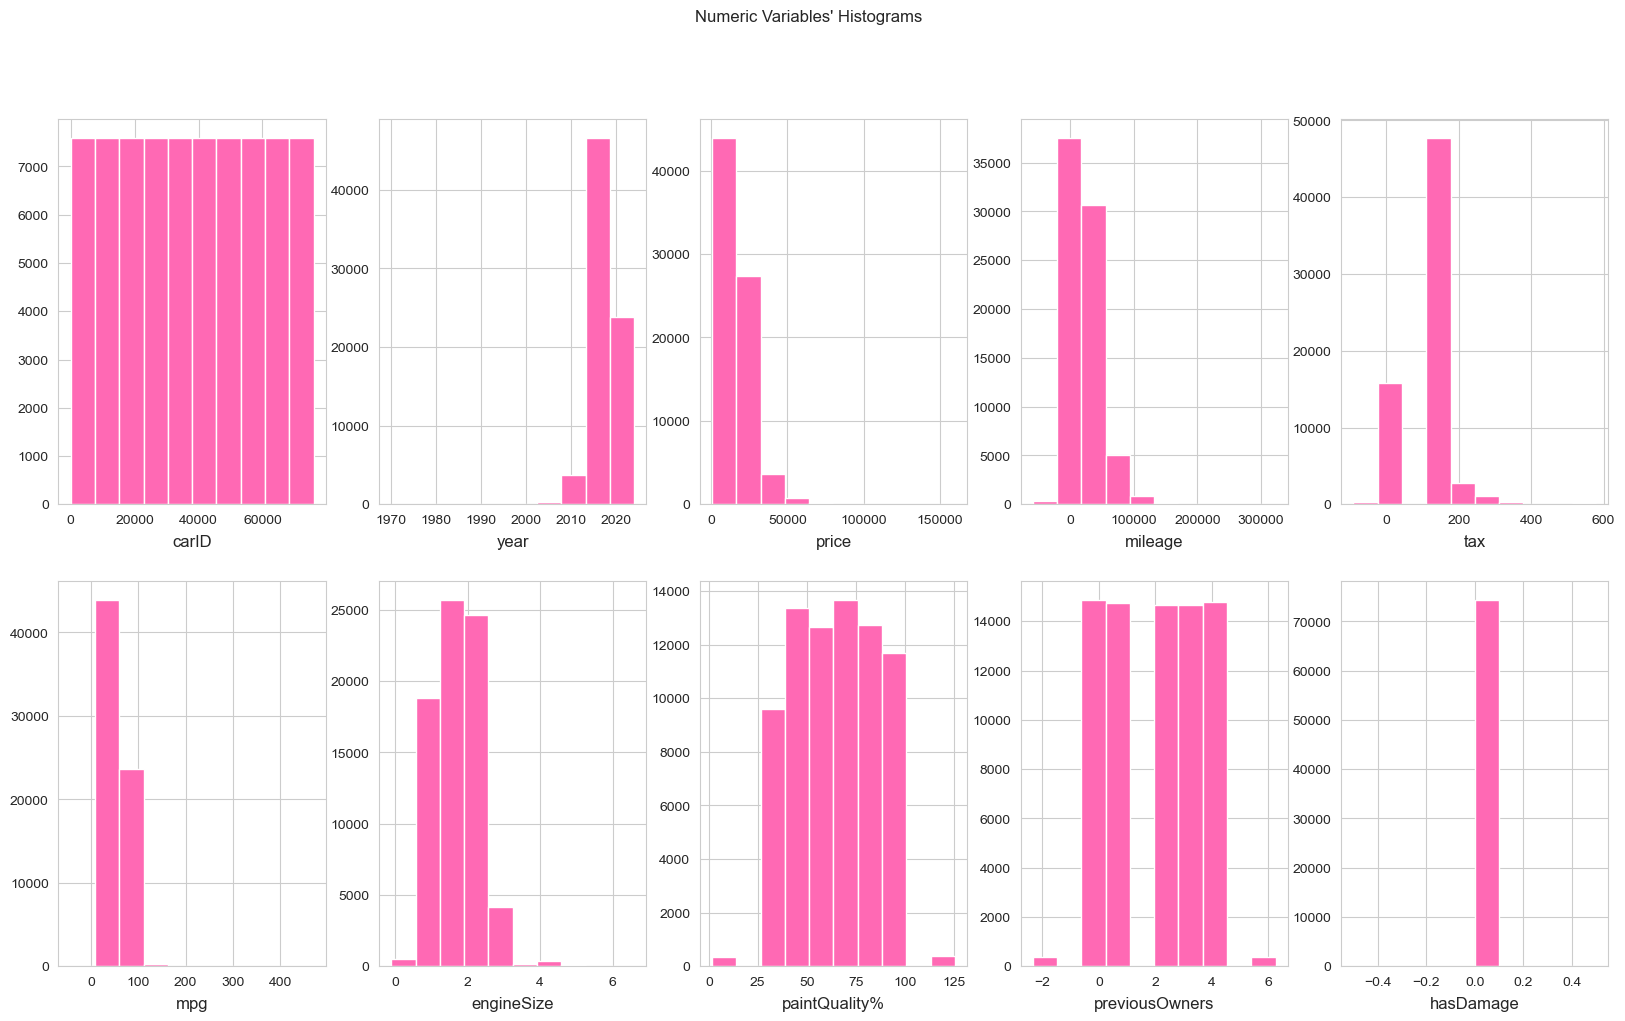

In [26]:
sns.set_style('whitegrid')

# We will put all the numeric variables' histograms in one figure
# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(numeric_features) / 2 ), figsize = (20, 11))

for ax, feat in zip(axes.flatten(), numeric_features):
    ax.hist(df_train[feat], color = 'hotpink')
    ax.set_title(feat, y = -0.13)

# Add a centered title to the figure:
plt.suptitle("Numeric Variables' Histograms")

plt.show()


- CarID has a uniform distribuition, starting at 0
- the majority of the distribuition for year is concentrated in 2010-2024, we probably have low outliers.


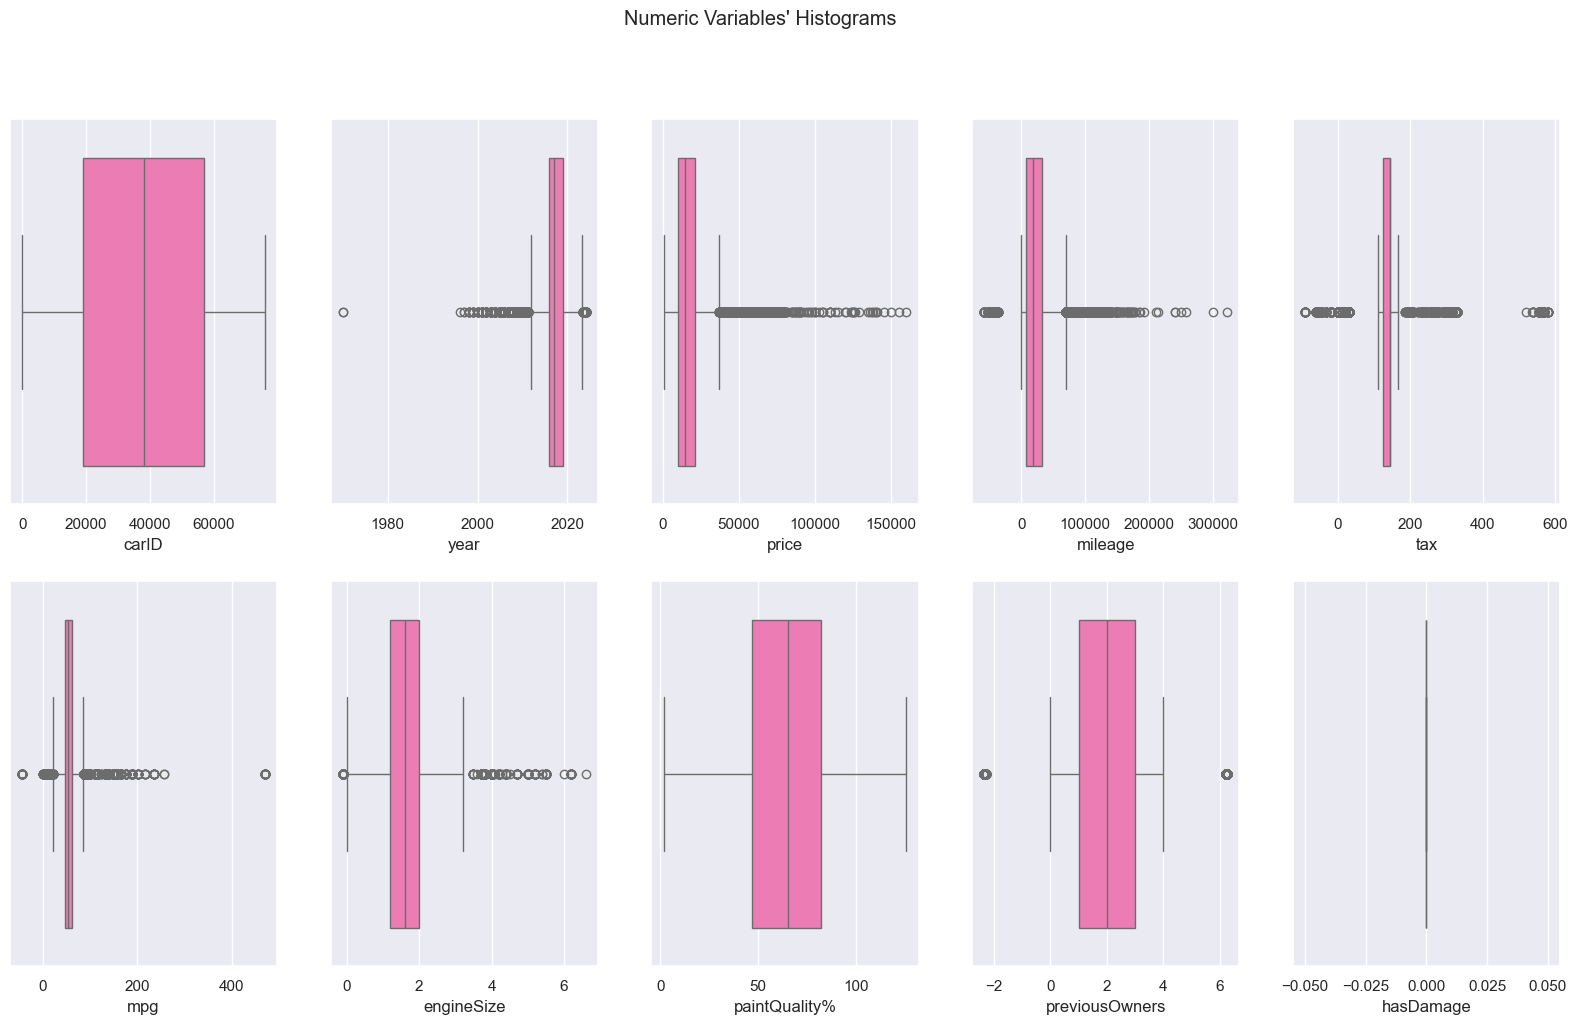

In [27]:
sns.set()

# We will put all the numeric variables' histograms in one figure
# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(numeric_features) / 2 ), figsize = (20, 11))

for ax, feat in zip(axes.flatten(), numeric_features):
    sns.boxplot(x=df_train[feat], ax=ax, color='hotpink')

# Add a centered title to the figure:
plt.suptitle("Numeric Variables' Histograms")

plt.show()

CarID, paintQuality% and hasDamage appear to be the only features without outliers. hasDamage is a straight line only since it only has 0 ou NA.

The remaining features have a lot of outliers, and very extreme ones since the distribuition is very compressed.

In [28]:
# # Obtain correlation matrix. 
# Round to 2 decimal places

corr = df_train[numeric_features].corr(method="spearman")

corr = corr.round(2)
corr


,carID,year,price,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,1.00,0.01,-0.21,-0.02,-0.04,-0.01,-0.18,-0.01,-0.00,NaN
year,0.01,1.00,0.60,-0.78,0.32,-0.31,-0.04,0.00,0.00,NaN
price,-0.21,0.60,1.00,-0.51,0.31,-0.39,0.56,0.00,-0.00,NaN
mileage,-0.02,-0.78,-0.51,1.00,-0.25,0.32,0.10,-0.00,0.00,NaN
tax,-0.04,0.32,0.31,-0.25,1.00,-0.55,0.16,0.00,-0.00,NaN
mpg,-0.01,-0.31,-0.39,0.32,-0.55,1.00,-0.20,0.00,0.00,NaN
engineSize,-0.18,-0.04,0.56,0.10,0.16,-0.20,1.00,0.00,0.00,NaN
paintQuality%,-0.01,0.00,0.00,-0.00,0.00,0.00,0.00,1.00,-0.01,NaN
previousOwners,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.01,1.00,NaN
hasDamage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


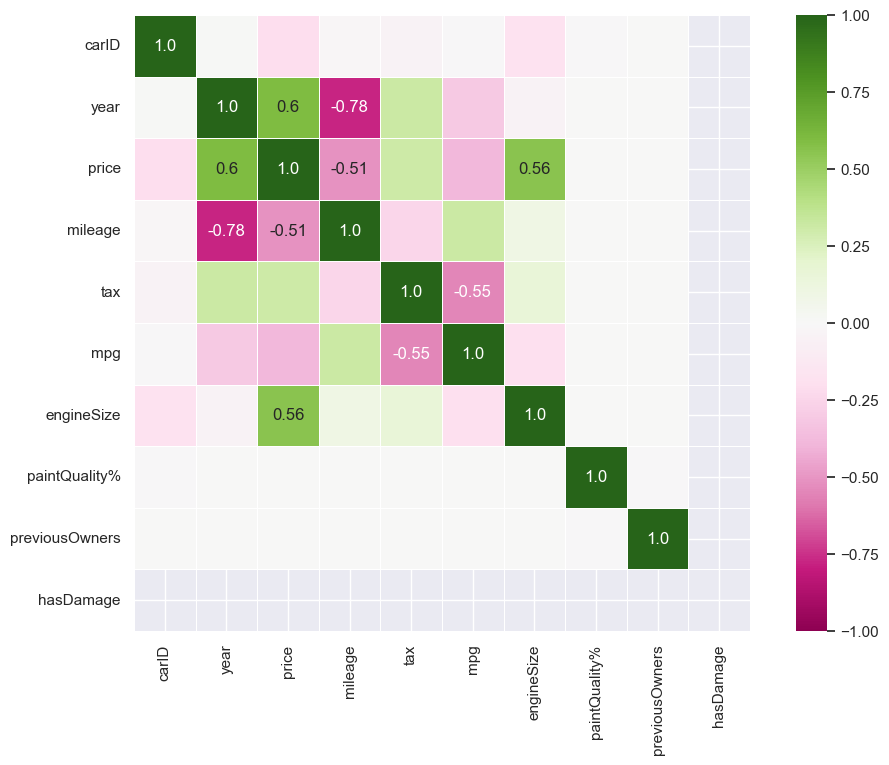

In [29]:

# Prepare figure
fig = plt.figure(figsize=(12, 8))

# percebr melhor o que está a acontecer aqui
mask_annot = np.absolute(corr.values) >= 0.5 
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) 


# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, 
            annot=annot, # Specify custom annotation
            fmt='s', # The annotation matrix now has strings, so we need to explicitly say this
            vmin=-1, vmax=1, 
            center=0, # Center the colormap at zero
            square=True, # Make each cell square-shaped
            linewidths=.5, # Add lines between cells
            cmap='PiYG' # Diverging color map
            )

# ## Once you are happy, save this as an image
# # plt.savefig(os.path.join('..', 'figures', 'eda', 'correlation_matrix.png'), dpi=200)

plt.show()

# ## How can we improve this figure?

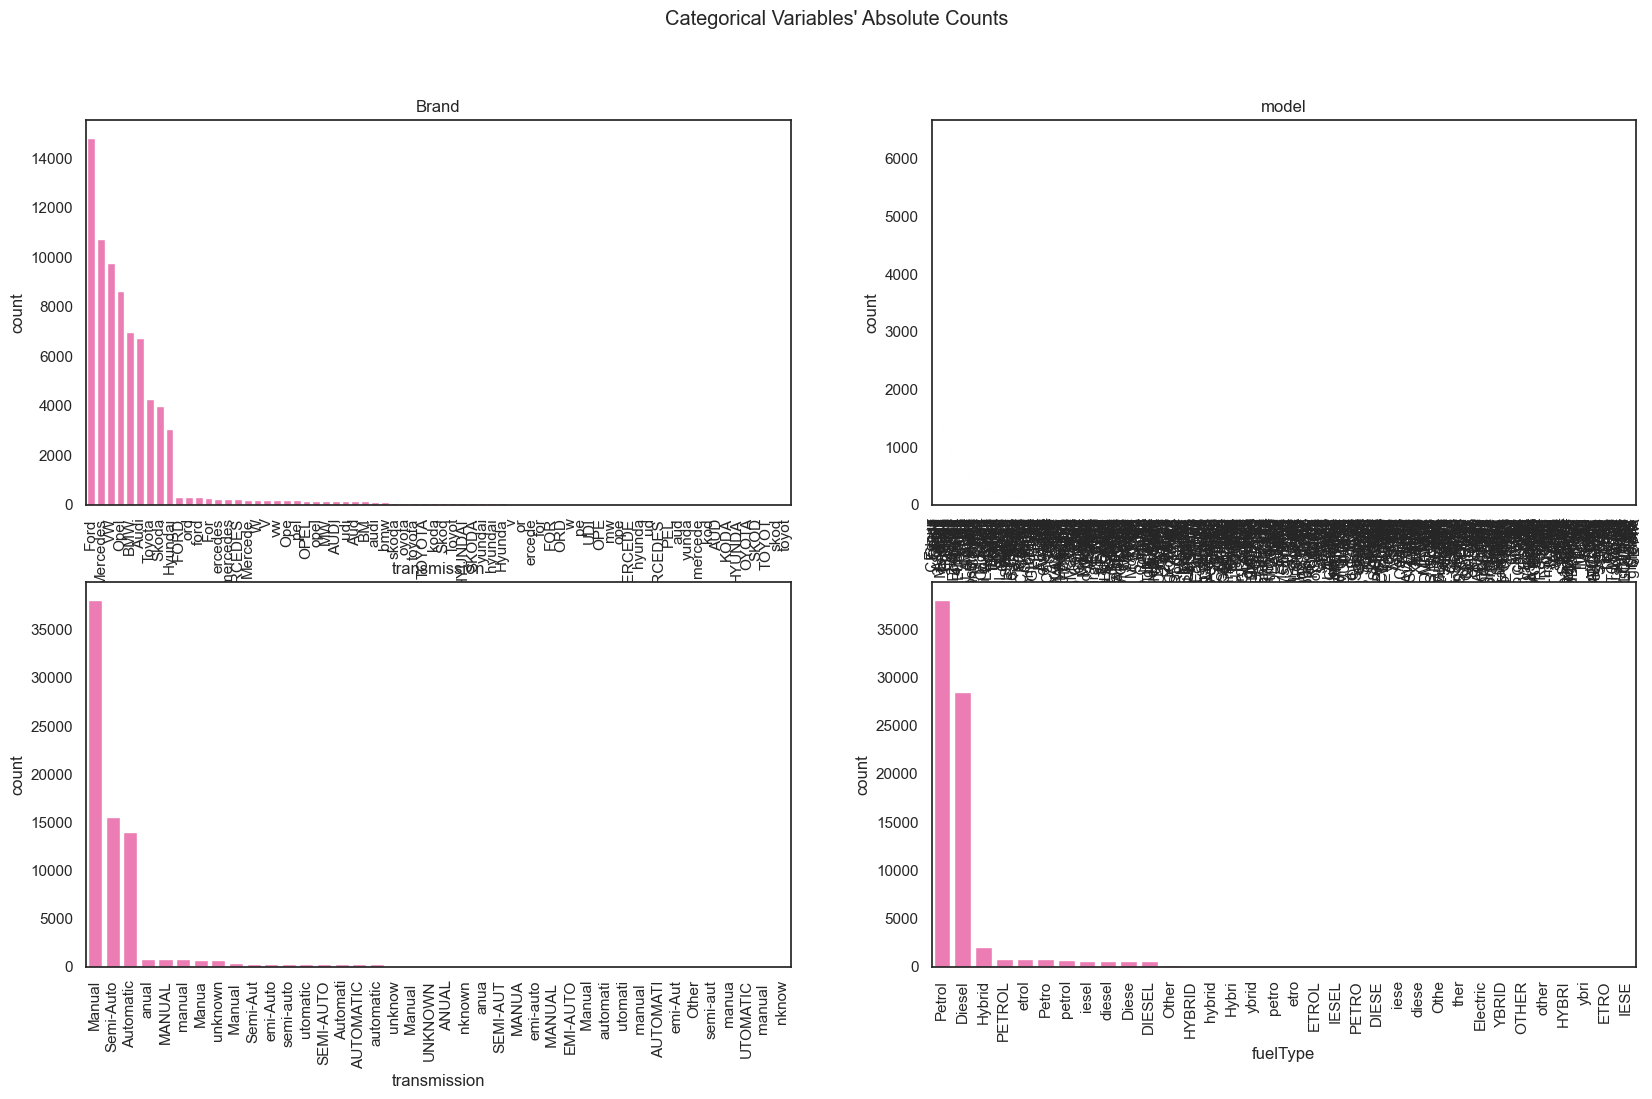

In [30]:
sns.set(style="white")

fig, axes = plt.subplots(
    2, 
    ceil(len(categorical_features) / 2), 
    figsize=(20, 11)
    )

for ax, feat in zip(axes.flatten(), categorical_features):
    sns.countplot(x=df_train[feat], ax=ax, 
                  order=df_train[feat].value_counts().index, color = 'hotpink') 
    ax.set_title(feat)
    ax.tick_params(axis='x', rotation=90)  # roda os labels no eixo x


plt.suptitle("Categorical Variables' Absolute Counts")
plt.show()

With these plots we can visualize the problems in these columns, the huge amount of classes, most with very low frequency and simillar names.

### Data Preparation

What we will have to do based on the insights from the Data Understanding:
- Fix the name differences of the categorical variables
- Fix the negative numbers in the numerical variables
- Deal with the observations with paintQuality% higher than 100
- Round the values in year
- Drop the observations with the year 1970
- Transform hasDamage into a boolean
- Deal with missing values

'VW' 'Toyota' 'Audi' 'Ford' 'BMW' 'Skoda' 'Opel' 'Mercedes' 'FOR'
 'mercedes' 'Hyundai' 'w' 'ord' 'MW' 'bmw' nan 'yundai' 'BM' 'Toyot' 'udi'
 'Ope' 'AUDI' 'V' 'opel' 'pel' 'For' 'pe' 'Mercede' 'audi' 'MERCEDES'
 'OPEL' 'koda' 'FORD' 'Hyunda' 'W' 'Aud' 'vw' 'hyundai' 'skoda' 'ford'
 'TOYOTA' 'ercedes' 'oyota' 'toyota' 'SKODA' 'Skod' 'HYUNDAI' 'kod' 'v'
 'for' 'SKOD' 'aud' 'KODA' 'PEL' 'yunda' 'or' 'UDI' 'OYOTA' 'HYUNDA' 'mw'
 'OPE' 'mercede' 'ERCEDES' 'ercede' 'TOYOT' 'MERCEDE' 'ORD' 'ud' 'ope'
 'AUD' 'hyunda' 'skod' 'toyot

In [31]:
difflib.get_close_matches('Volkswagen', ['VW', 'Toyota', 'Audi', 'Ford', 'BMW', 'Skoda', 'Opel', 'Mercedes',
          'FOR', 'mercedes', 'Hyundai', 'w', 'ord', 'MW', 'bmw', 'yundai', 
          'BM', 'Toyot', 'udi', 'Ope', 'AUDI', 'V', 'opel', 'pel', 'For', 
          'pe', 'Mercede', 'audi', 'MERCEDES', 'OPEL', 'koda', 'FORD', 
          'Hyunda', 'W', 'Aud', 'vw', 'hyundai', 'skoda', 'ford', 'TOYOTA', 
          'ercedes', 'oyota', 'toyota', 'SKODA', 'Skod', 'HYUNDAI', 'kod', 
          'v', 'for', 'SKOD', 'aud', 'KODA', 'PEL', 'yunda', 'or', 'UDI', 
          'OYOTA', 'HYUNDA', 'mw', 'OPE', 'mercede', 'ERCEDES', 'ercede', 
          'TOYOT', 'MERCEDE', 'ORD', 'ud', 'ope', 'AUD', 'hyunda', 'skod', 'toyot'], n= 10, cutoff=0.5)

[]

In [32]:
#!pip install rapidfuzz

In [33]:

from rapidfuzz import process

choices = ['VW', 'Toyota', 'Audi', 'Ford', 'BMW', 'Skoda', 'Opel', 'Mercedes',
          'FOR', 'mercedes', 'Hyundai', 'w', 'ord', 'MW', 'bmw', 'yundai', 
          'BM', 'Toyot', 'udi', 'Ope', 'AUDI', 'V', 'opel', 'pel', 'For', 
          'pe', 'Mercede', 'audi', 'MERCEDES', 'OPEL', 'koda', 'FORD', 
          'Hyunda', 'W', 'Aud', 'vw', 'hyundai', 'skoda', 'ford', 'TOYOTA', 
          'ercedes', 'oyota', 'toyota', 'SKODA', 'Skod', 'HYUNDAI', 'kod', 
          'v', 'for', 'SKOD', 'aud', 'KODA', 'PEL', 'yunda', 'or', 'UDI', 
          'OYOTA', 'HYUNDA', 'mw', 'OPE', 'mercede', 'ERCEDES', 'ercede', 
          'TOYOT', 'MERCEDE', 'ORD', 'ud', 'ope', 'AUD', 'hyunda', 'skod', 'toyot']

# Encontrar o melhor match
best_match = process.extract('SKODA', choices, score_cutoff=65)
print(best_match)

[('SKODA', 100.0, 43), ('SKOD', 88.88888888888889, 49), ('KODA', 88.88888888888889, 51)]


Coisas a fazer:
- aprender a corrigir model e brand com difflib
- corrigir missing values em model e brand: 
    - em model agrupamos a brand dele e colocamos a moda
    - em brand pegamos no modelo e vamos ao data set e a primeira vez que aparecer o modelo pegamos nessa brand
- juntar todos os erros de valores negativos
- eliminar as observações acima de 2020 no ano
- ver se no previous owners se as observações acima de 6 são parecidas
- ver se as observações de paintQuality acima de 100 são similares às de 100, se for substituir por 100, se não for trocar por NA
- carros automaticos não têm mpg logo se tiverem NA passa para Unkown. Os carros atuais têm por volta de 50 mpg.
 Ver valores menor que 10 e maiores do que 60/70, porque nao é possivel.
    

In [34]:
def correct_brand_w(brand, model):
    if isinstance(brand, str) and brand.lower() == 'w':
        for brand_in_column, model_in_column in zip(df_train['Brand'], df_train['model']):
            if model_in_column == model:
                return brand_in_column
               
    return brand

In [35]:
df_train['Brand'] = df_train.apply(lambda row: correct_brand_w(row['Brand'], row['model']), axis = 1)

In [36]:
df_train[df_train['Brand']=='w']

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage


In [37]:
df_train[df_train['Brand']=='W']

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
11970,67375,W,Caddy Maxi,2012.0,9995,Semi-Auto,53000.0,Diesel,200.0,48.7,1.6,47.0,4.0,0.0
13087,65456,W,NaN,2019.0,16500,Manual,3000.0,Diesel,145.0,57.7,1.6,38.0,2.0,0.0
46068,74210,W,NaN,2019.0,19450,Semi-Auto,3700.0,Diesel,145.0,52.3,2.0,87.0,3.0,0.0
53620,66941,W,NaN,2019.0,26310,Automatic,6000.0,NaN,145.0,37.7,1.5,70.0,3.0,0.0


In [38]:
df_train[df_train['model'] ==' Caddy Maxi']

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
11970,67375,W,Caddy Maxi,2012.0,9995,Semi-Auto,53000.0,Diesel,200.0,48.7,1.600000,47.0,4.0,0.0
29778,70169,VW,Caddy Maxi,2015.0,9949,Automatic,93113.0,Diesel,160.0,52.3,1.600000,99.0,3.0,0.0
64781,71646,VW,Caddy Maxi,2017.0,15950,Semi-Auto,25510.0,NaN,145.0,56.5,2.000000,80.0,0.0,0.0
75874,70592,VW,Caddy Maxi,2015.0,9995,Semi-Auto,66000.0,DIESEL,200.0,48.7,0.186425,34.0,3.0,0.0


We can see that we fixed the problem with the brand 'w' except for the cases with null values and for Caddy Maxi, which is from Volkswagen and we only have one observation so we can do it manually.

In [39]:
df_train.loc[
    (df_train['model'] ==' Caddy Maxi') & (df_train['Brand'] =='W'),
    'Brand'
] = 'VW'

df_train[df_train['model'] ==' Caddy Maxi']

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
11970,67375,VW,Caddy Maxi,2012.0,9995,Semi-Auto,53000.0,Diesel,200.0,48.7,1.600000,47.0,4.0,0.0
29778,70169,VW,Caddy Maxi,2015.0,9949,Automatic,93113.0,Diesel,160.0,52.3,1.600000,99.0,3.0,0.0
64781,71646,VW,Caddy Maxi,2017.0,15950,Semi-Auto,25510.0,NaN,145.0,56.5,2.000000,80.0,0.0,0.0
75874,70592,VW,Caddy Maxi,2015.0,9995,Semi-Auto,66000.0,DIESEL,200.0,48.7,0.186425,34.0,3.0,0.0


In [40]:
# only run once
def get_similar_column_groups(df_train, column):
    column_values = df_train[column].dropna().str.upper().str.strip().unique().tolist()
    similar_groups = []
    for value in column_values:
        similar_groups_flat = [item for sublist in similar_groups if sublist is not None for item in sublist]
        if value in similar_groups_flat :
            continue
        else:
            best_matches = process.extract(value, column_values, score_cutoff=80)
            column_best_matches = [match[0] for match in best_matches]
            if value not in column_best_matches:
                column_best_matches.append(value)
            similar_groups.append(column_best_matches)
    return similar_groups

similar_groups_brand = get_similar_column_groups(df_train, 'Brand')
similar_groups_brand
    


[['VW', 'V', 'W'],
 ['TOYOTA', 'TOYOT', 'OYOTA'],
 ['AUDI', 'UD', 'UDI', 'AUD'],
 ['FORD', 'OR', 'FOR', 'ORD'],
 ['BMW', 'MW', 'BM', 'W'],
 ['SKODA', 'KOD', 'KODA', 'SKOD'],
 ['OPEL', 'PE', 'OPE', 'PEL'],
 ['MERCEDES', 'MERCEDE', 'ERCEDES', 'ERCEDE'],
 ['HYUNDAI', 'YUNDAI', 'HYUNDA', 'YUNDA']]

In [41]:
def correct_column(brand, similar_groups):
    if pd.isna(brand):
        return brand
    brand = brand.upper().strip()
    for group in similar_groups:
        if brand in group :
            # returns the match that is the longest, since it will be the complete one
            return max(group, key=len) 
    return brand.strip()

df_train['Brand'] = df_train['Brand'].apply(lambda x: correct_column(x, similar_groups_brand))
df_train

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,TOYOTA,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,AUDI,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,FORD,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75968,37194,MERCEDES,C Class,2015.0,13498,Manual,14480.0,etrol,125.0,53.300000,2.0,78.0,0.000000,0.0
75969,6265,AUDI,Q3,2013.0,12495,Semi-Auto,52134.0,Diesel,200.0,47.900000,2.0,38.0,2.000000,0.0
75970,54886,TOYOTA,Aygo,2017.0,8399,Automatic,11304.0,Petrol,145.0,67.000000,1.0,57.0,3.000000,0.0
75971,860,AUDI,Q3,2015.0,12990,Manual,69072.0,iesel,125.0,60.100000,2.0,74.0,2.000000,0.0


In [42]:
df_train['Brand'].unique()

array(['VW', 'TOYOTA', 'AUDI', 'FORD', 'BMW', 'SKODA', 'OPEL', 'MERCEDES',
       'HYUNDAI', nan], dtype=object)

In [43]:
similar_groups_transmission = get_similar_column_groups(df_train, 'transmission')
similar_groups_transmission

[['SEMI-AUTO', 'SEMI-AUT', 'EMI-AUTO', 'EMI-AUT'],
 ['MANUAL', 'ANUAL', 'MANUA', 'ANUA'],
 ['AUTOMATIC', 'AUTOMATI', 'UTOMATIC', 'UTOMATI'],
 ['UNKNOWN', 'UNKNOW', 'NKNOWN', 'NKNOW'],
 ['OTHER']]

In [44]:
df_train['transmission'] = df_train['transmission'].apply(lambda x: correct_column(x, similar_groups_transmission))
df_train

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,SEMI-AUTO,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,TOYOTA,Yaris,2019.0,13790,MANUAL,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,AUDI,Q2,2019.0,24990,SEMI-AUTO,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,FORD,FIESTA,2018.0,12500,MANUAL,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,2019.0,22995,MANUAL,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75968,37194,MERCEDES,C Class,2015.0,13498,MANUAL,14480.0,etrol,125.0,53.300000,2.0,78.0,0.000000,0.0
75969,6265,AUDI,Q3,2013.0,12495,SEMI-AUTO,52134.0,Diesel,200.0,47.900000,2.0,38.0,2.000000,0.0
75970,54886,TOYOTA,Aygo,2017.0,8399,AUTOMATIC,11304.0,Petrol,145.0,67.000000,1.0,57.0,3.000000,0.0
75971,860,AUDI,Q3,2015.0,12990,MANUAL,69072.0,iesel,125.0,60.100000,2.0,74.0,2.000000,0.0


In [45]:
df_train['transmission'].unique()

array(['SEMI-AUTO', 'MANUAL', 'AUTOMATIC', nan, 'UNKNOWN', 'OTHER'],
      dtype=object)

In [46]:
similar_groups_fuelType = get_similar_column_groups(df_train, 'fuelType')
similar_groups_fuelType

[['PETROL', 'ETROL', 'PETRO', 'ETRO'],
 ['DIESEL', 'IESEL', 'DIESE', 'IESE'],
 ['HYBRID', 'HYBRI', 'YBRID', 'YBRI'],
 ['OTHER', 'THER', 'OTHE'],
 ['ELECTRIC']]

In [47]:
df_train['fuelType'] = df_train['fuelType'].apply(lambda x: correct_column(x, similar_groups_fuelType))
df_train

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,SEMI-AUTO,28421.0,PETROL,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,TOYOTA,Yaris,2019.0,13790,MANUAL,4589.0,PETROL,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,AUDI,Q2,2019.0,24990,SEMI-AUTO,3624.0,PETROL,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,FORD,FIESTA,2018.0,12500,MANUAL,9102.0,PETROL,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,2019.0,22995,MANUAL,1000.0,PETROL,145.0,42.800000,1.5,97.0,3.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75968,37194,MERCEDES,C Class,2015.0,13498,MANUAL,14480.0,PETROL,125.0,53.300000,2.0,78.0,0.000000,0.0
75969,6265,AUDI,Q3,2013.0,12495,SEMI-AUTO,52134.0,DIESEL,200.0,47.900000,2.0,38.0,2.000000,0.0
75970,54886,TOYOTA,Aygo,2017.0,8399,AUTOMATIC,11304.0,PETROL,145.0,67.000000,1.0,57.0,3.000000,0.0
75971,860,AUDI,Q3,2015.0,12990,MANUAL,69072.0,DIESEL,125.0,60.100000,2.0,74.0,2.000000,0.0


In [48]:
df_train['fuelType'].unique()

array(['PETROL', 'DIESEL', 'HYBRID', nan, 'OTHER', 'ELECTRIC'],
      dtype=object)

In [49]:
df_train['model'].unique()

array([' Golf', ' Yaris', ' Q2', ' FIESTA', ' 2 Series', '3 Series',
       ' A3', ' Octavia', ' Passat', ' Focus', ' Insignia', ' A Clas',
       ' Q3', ' Fabia', ' A Class', ' Ka+', ' 3 Series', ' GLC Class',
       ' I30', ' C Class', ' Polo', ' E Class', ' C Clas', ' Q5', ' Up',
       ' Fiesta', ' C-HR', ' Mokka X', ' Corsa', ' Astra', ' TT',
       ' 5 Series', ' Aygo', ' 4 Series', ' SLK', ' Viva', ' T-Roc',
       'Focus', ' EcoSport', ' Tucson', ' EcoSpor', nan, ' X-CLASS',
       ' CL Class', ' IX20', ' i20', ' Rapid', ' a1', ' Auris', ' sharan',
       ' I20', ' Adam', ' X3', ' A8', ' GLS Class', ' B-MAX', ' A4',
       ' Kona', ' I10', ' A1', ' Mokka', ' fiesta', ' S-MAX', ' X2',
       ' Crossland X', ' Tiguan', ' A5', ' GLE Class', ' C CLASS',
       ' mokka x', ' Zafira', ' Ioniq', ' A6', ' Mondeo', ' Yeti Outdoor',
       ' X1', 'POLO', ' INSIGNIA', ' Scala', ' S Class', ' 1 Series',
       ' Kamiq', ' Kuga', ' Tourneo Connect', ' Q7', ' GLA Class',
       ' Arteon', ' 

Temos Q, Q2 , Q3 não sei a qual o Q está associado
I3 e I30 são diff mas estão a ser agrupados na mesma categoria, I3 é Elétrico I30 não

In [64]:
# only run once
def get_similar_model_groups(df_train):
    models = df_train['model'].dropna().str.upper().str.strip().str.replace(" ", "_").unique().tolist()
    similar_groups = []

    for model in models:
        similar_groups_flat = [item for sublist in similar_groups if sublist is not None for item in sublist]
        if model in similar_groups_flat :
            continue
        elif any(element.isdigit() for element in model):
            similar_groups.append([model])
        else:
            best_matches = process.extract(model, models, score_cutoff=85)
            model_best_matches = [match[0] for match in best_matches if abs(len(match[0]) - len(model)) <= 1]
            if model not in model_best_matches:
                model_best_matches.append(model)
            similar_groups.append(model_best_matches)
    return similar_groups

similar_groups_model = get_similar_model_groups(df_train)
similar_groups_model

# para este testar várias métricas diferentes.

[['GOLF', 'GOL'],
 ['YARIS', 'YARI'],
 ['Q2'],
 ['FIESTA', 'FIEST'],
 ['2_SERIES'],
 ['3_SERIES'],
 ['A3'],
 ['OCTAVIA', 'OCTAVI'],
 ['PASSAT', 'PASSA'],
 ['FOCUS', 'FOCU'],
 ['INSIGNIA', 'INSIGNI'],
 ['A_CLAS', 'A_CLASS'],
 ['Q3'],
 ['FABIA', 'FABI'],
 ['KA+', 'KA'],
 ['GLC_CLASS', 'GL_CLASS', 'GLC_CLAS', 'GLS_CLASS'],
 ['I30'],
 ['C_CLASS', 'CL_CLASS', 'C_CLAS'],
 ['POLO', 'POL'],
 ['E_CLASS', 'E_CLAS', 'A_CLASS'],
 ['Q5'],
 ['UP', 'U'],
 ['C-HR', 'C-H'],
 ['MOKKA_X'],
 ['CORSA', 'CORS'],
 ['ASTRA', 'ASTR'],
 ['TT', 'T'],
 ['5_SERIES'],
 ['AYGO', 'AYG'],
 ['4_SERIES'],
 ['SLK', 'SL'],
 ['VIVA', 'VIV'],
 ['T-ROC', 'T-RO'],
 ['ECOSPORT', 'ECOSPOR'],
 ['TUCSON', 'TUCSO'],
 ['X-CLASS', 'X-CLAS'],
 ['IX20'],
 ['I20'],
 ['RAPID', 'RAPI'],
 ['A1'],
 ['AURIS', 'AURI'],
 ['SHARAN', 'SHARA'],
 ['ADAM', 'ADA'],
 ['X3'],
 ['A8'],
 ['B-MAX', 'B-MA'],
 ['A4'],
 ['KONA', 'KON'],
 ['I10'],
 ['MOKKA'],
 ['S-MAX', 'S-MA'],
 ['X2'],
 ['CROSSLAND_X'],
 ['TIGUAN', 'TIGUA'],
 ['A5'],
 ['GLE_CLASS', 'GLE_C

In [65]:
" " in "d a"

True

In [69]:
from difflib import get_close_matches

def get_prefix(model):
    # takes the prefix or the first letter of the model
    return model.split("_")[0]

def similar_models(df_train):
    models = df_train['model'].dropna().str.upper().str.strip().unique().tolist()
    similar_groups = []
    
    for model in models:
        similar_groups_flat = [item for sublist in similar_groups if sublist is not None for item in sublist]
        if model in similar_groups_flat:
            continue
        else:
             close_matches = get_close_matches(model, models, cutoff=0.85)
             model_prefix = get_prefix(model)
             sequencial_matches = [match for match in close_matches if model in match or match in model]
             if " " in model:
                sequencial_matches = [match for match in sequencial_matches if get_prefix(match) == model_prefix]
             if model not in sequencial_matches:
                 sequencial_matches.append(model)
             similar_groups.append(sequencial_matches)

    return similar_groups

similar_brands = similar_models(df_train)
similar_brands
             

[['GOLF', 'GOL'],
 ['YARIS', 'YARI'],
 ['Q2'],
 ['FIESTA', 'FIEST'],
 ['2 SERIES'],
 ['3 SERIES'],
 ['A3'],
 ['OCTAVIA', 'OCTAVI'],
 ['PASSAT', 'PASSA'],
 ['FOCUS', 'FOCU'],
 ['INSIGNIA', 'INSIGNI'],
 ['A CLAS'],
 ['Q3'],
 ['FABIA', 'FABI'],
 ['A CLASS'],
 ['KA+'],
 ['GLC CLASS'],
 ['I30'],
 ['C CLASS'],
 ['POLO', 'POL'],
 ['E CLASS'],
 ['C CLAS'],
 ['Q5'],
 ['UP'],
 ['C-HR', 'C-H'],
 ['MOKKA X'],
 ['CORSA', 'CORS'],
 ['ASTRA', 'ASTR'],
 ['TT'],
 ['5 SERIES'],
 ['AYGO', 'AYG'],
 ['4 SERIES'],
 ['SLK'],
 ['VIVA', 'VIV'],
 ['T-ROC', 'T-RO'],
 ['ECOSPORT', 'ECOSPOR'],
 ['TUCSON', 'TUCSO'],
 ['X-CLASS', 'X-CLAS'],
 ['CL CLASS'],
 ['IX20', 'IX2'],
 ['I20'],
 ['RAPID', 'RAPI'],
 ['A1'],
 ['AURIS', 'AURI'],
 ['SHARAN', 'SHARA'],
 ['ADAM', 'ADA'],
 ['X3'],
 ['A8'],
 ['GLS CLASS'],
 ['B-MAX', 'B-MA'],
 ['A4'],
 ['KONA', 'KON'],
 ['I10'],
 ['MOKKA', 'MOKK'],
 ['S-MAX', 'S-MA'],
 ['X2'],
 ['CROSSLAND X'],
 ['TIGUAN', 'TIGUA'],
 ['A5'],
 ['GLE CLASS'],
 ['ZAFIRA', 'ZAFIR'],
 ['IONIQ', 'IONI'],
 ['

In [70]:
def correct_column_model(model, similar_groups):
    if pd.isna(model):
        return model
    elif len(model) == 1:
        return np.nan
    model = model.upper().strip()
    for group in similar_groups:
        if model in group :
            # returns the match that is the longest, since it will be the complete one
            return max(group, key=len) 
    return model

df_train['model'] = df_train['model'].apply(lambda x: correct_column_model(x, similar_groups_model))
df_train

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512.0,VW,GOLF,2016.0,22290.0,SEMI-AUTO,28421.0,PETROL,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000.0,TOYOTA,YARIS,2019.0,13790.0,MANUAL,4589.0,PETROL,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366.0,AUDI,Q2,2019.0,24990.0,SEMI-AUTO,3624.0,PETROL,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021.0,FORD,FIESTA,2018.0,12500.0,MANUAL,9102.0,PETROL,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062.0,BMW,2 SERIES,2019.0,22995.0,MANUAL,1000.0,PETROL,145.0,42.800000,1.5,97.0,3.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75968,37194.0,MERCEDES,C CLASS,2015.0,13498.0,MANUAL,14480.0,PETROL,125.0,53.300000,2.0,78.0,0.000000,0.0
75969,6265.0,AUDI,Q3,2013.0,12495.0,SEMI-AUTO,52134.0,DIESEL,200.0,47.900000,2.0,38.0,2.000000,0.0
75970,54886.0,TOYOTA,AYGO,2017.0,8399.0,AUTOMATIC,11304.0,PETROL,145.0,67.000000,1.0,57.0,3.000000,0.0
75971,860.0,AUDI,Q3,2015.0,12990.0,MANUAL,69072.0,DIESEL,125.0,60.100000,2.0,74.0,2.000000,0.0


In [72]:
df_train['model'].unique()

array(['GOLF', 'YARIS', 'Q2', 'FIESTA', '2 SERIES', '3 SERIES', 'A3',
       'OCTAVIA', 'PASSAT', 'FOCUS', 'INSIGNIA', 'A CLAS', 'Q3', 'FABIA',
       'A CLASS', 'KA+', 'GLC CLASS', 'I30', 'C CLASS', 'POLO', 'E CLASS',
       'C CLAS', 'Q5', 'UP', 'C-HR', 'MOKKA X', 'CORSA', 'ASTRA', 'TT',
       '5 SERIES', 'AYGO', '4 SERIES', 'SLK', 'VIVA', 'T-ROC', 'ECOSPORT',
       'TUCSON', nan, 'X-CLASS', 'CL CLASS', 'IX20', 'I20', 'RAPID', 'A1',
       'AURIS', 'SHARAN', 'ADAM', 'X3', 'A8', 'GLS CLASS', 'B-MAX', 'A4',
       'KONA', 'I10', 'MOKKA', 'S-MAX', 'X2', 'CROSSLAND X', 'TIGUAN',
       'A5', 'GLE CLASS', 'ZAFIRA', 'IONIQ', 'A6', 'MONDEO',
       'YETI OUTDOOR', 'X1', 'SCALA', 'S CLASS', '1 SERIES', 'KAMIQ',
       'KUGA', 'TOURNEO CONNECT', 'Q7', 'GLA CLASS', 'ARTEON', 'SL CLASS',
       'SANTA FE', 'GRANDLAND X', 'I800', 'RAV4', 'TOURAN', 'CITIGO',
       'ROOMSTER', 'PRIUS', 'COROLLA', 'B CLASS', 'KODIAQ', 'V CLASS',
       'E CLAS', 'CADDY MAXI LIFE', 'SUPERB', 'GETZ', 'COMBO LIFE',

In [ ]:
df

GLA CLASS e A CLASS são modelos diferentes. 
B CLASS e GLB CLASS são modelos diferentes.
E CLASS e GLE CLASS são modelos diferentes.

Adicionar condição de que o prefixo de ambos tem de ser igual

In [52]:
df_train[df_train['model'].str.upper() =='GBL CLASS']

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage


In [53]:
df_train['model'] = df_train['model'].apply(lambda x: correct_column(x, similar_groups_brand))
df_train

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,GOLF,2016.0,22290,SEMI-AUTO,28421.0,PETROL,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,TOYOTA,YARIS,2019.0,13790,MANUAL,4589.0,PETROL,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,AUDI,Q2,2019.0,24990,SEMI-AUTO,3624.0,PETROL,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,FORD,FIESTA,2018.0,12500,MANUAL,9102.0,PETROL,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 SERIES,2019.0,22995,MANUAL,1000.0,PETROL,145.0,42.800000,1.5,97.0,3.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75968,37194,MERCEDES,C CLASS,2015.0,13498,MANUAL,14480.0,PETROL,125.0,53.300000,2.0,78.0,0.000000,0.0
75969,6265,AUDI,Q3,2013.0,12495,SEMI-AUTO,52134.0,DIESEL,200.0,47.900000,2.0,38.0,2.000000,0.0
75970,54886,TOYOTA,AYGO,2017.0,8399,AUTOMATIC,11304.0,PETROL,145.0,67.000000,1.0,57.0,3.000000,0.0
75971,860,AUDI,Q3,2015.0,12990,MANUAL,69072.0,DIESEL,125.0,60.100000,2.0,74.0,2.000000,0.0


In [54]:
df_train.loc[df_train['year'] > 2020, "year"] = np.nan

In [55]:
df_train['year'].isna().sum()

np.int64(1849)

Tratar de Paint Quality

In [56]:
filtered = df_train[df_train["paintQuality%"]>100]
filtered

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
171,15717,FORD,FIESTA,2018.0,10491,MANUAL,6522.0,PETROL,145.0,65.7,1.0,125.109951,3.0,0.0
194,11200,BMW,4 SERIES,2019.0,23591,SEMI-AUTO,6100.0,PETROL,145.0,45.6,2.0,125.569499,2.0,0.0
272,53403,TOYOTA,AYGO,2016.0,7995,MANUAL,25300.0,NaN,0.0,69.0,1.0,125.594308,1.0,0.0
467,48038,SKODA,YETI OUTDOOR,2015.0,11995,SEMI-AUTO,19805.0,PETROL,125.0,51.4,1.2,125.453599,1.0,0.0
583,10137,BMW,5 SERIES,2017.0,21995,AUTOMATIC,18820.0,DIESEL,145.0,65.7,2.0,125.569499,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74763,75768,VW,TIGUAN,2018.0,18499,MANUAL,24940.0,PETROL,145.0,48.7,1.4,125.366507,0.0,0.0
75073,39666,MERCEDES,E CLASS,2017.0,21602,SEMI-AUTO,40690.0,DIESEL,145.0,NaN,3.0,125.202033,3.0,0.0
75135,23930,FORD,FIESTA,2020.0,15000,MANUAL,35.0,PETROL,145.0,56.5,1.0,125.109951,0.0,0.0
75540,38756,MERCEDES,GLS CLASS,2016.0,36495,SEMI-AUTO,33000.0,DIESEL,300.0,37.2,3.0,125.202033,2.0,0.0


In [57]:
# we cant find any reason for the incorrect values so we will make them NA
df_train.loc[df_train['paintQuality%']>100] = np.nan

In [58]:
df_train['fuelType'].unique()

array(['PETROL', 'DIESEL', 'HYBRID', nan, 'OTHER', 'ELECTRIC'],
      dtype=object)

In [59]:
df_train[df_train['fuelType']=='ELECTRIC']

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
6978,12786.0,NaN,I3,2015.0,17400.0,AUTOMATIC,29465.0,ELECTRIC,0.0,470.8,3.822758,67.0,2.0,0.0
37023,64169.0,OPEL,AMPERA,2015.0,12999.0,AUTOMATIC,34461.0,ELECTRIC,0.0,235.4,1.400000,83.0,1.0,0.0
52274,21931.0,FORD,MONDEO,NaN,15500.0,AUTOMATIC,24531.0,ELECTRIC,0.0,67.3,2.000000,82.0,4.0,0.0
52579,16306.0,FORD,MONDEO,2016.0,15975.0,AUTOMATIC,9396.0,ELECTRIC,0.0,67.3,2.000000,59.0,3.0,0.0


Electric cars have a similar thing to mpg, mpge that usualyy ranges between 90-135. Mpg usually ranges 10-80.

- Corrigir model, o que tiver um caracter mudar para NA
- Corrigir os 3 casos em falta
- Pssamos as observações negativas e floats de previous Owners para NA é um erro sistemético, igual para todos
- Em engine size passar os 0 e os negativos para NA  e subtituir pelo engineSizde de outra observação desse modelo.
- Os problemas de tax, millage e de mpg estão concentrados em Ford e Mercedes, nos mesmos modelos, vamos por em NA
- Ano arrendondamos os valores, assumimos que os decimais são a parte do ano correspondente a meses, usamos floor
- ver relacao de has damage com o preço, as distribuições ão super parecidas, não parece haver distinção de 0 e NA. Possivelmente fazer por coluna.
- ver correlações de variáveis categóricas e numericas
- para observações com NA em model e brand ambos e nao haver grande correlação com model e brand com outras variáveis, para NA em model vemos a moda na mesma brand, para NA em brand vemos o mesmo model na coluna e escolhemos.
- NA de ano fazer KNN de mileage, fazes a mediana dos anos e arredondas.
- milage agrupar por ano e fazer a mediana 
- para trasmission agrupamos por modelo e ver a moda
- fuelType agrupamos pelo modelo e ver a moda
- tax agrupar pelo ano e ver a mediana
- mpg agrupar pelo modelo e ver a mediana
- engineSize agrupar pelo modelo e ver a mediana
- paintQuality KNN da mileage e ver a mediana 
- Previous Owners KNN da mileage e ver a mediana
- 
